#Menginput Data

In [ ]:
!pip install pandas openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from google.colab import files
import seaborn as sns
from matplotlib import cm, colors

In [ ]:
def read_excel_data(file_path):
  try:
    df = pd.read_excel(file_path)
    return df
  except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    return None
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

file_path = "/content/Data Historis Ethereum.xlsx"
data = read_excel_data(file_path)
data

,Tanggal,Terakhir
0,2025-02-03,2882.03
1,2025-02-04,2731.75
2,2025-02-05,2785.58
3,2025-02-06,2688.20
4,2025-02-07,2622.68
...,...,...
75,2025-04-19,1613.31
76,2025-04-20,1587.29
77,2025-04-21,1579.57
78,2025-04-22,1756.24


## Plot Data

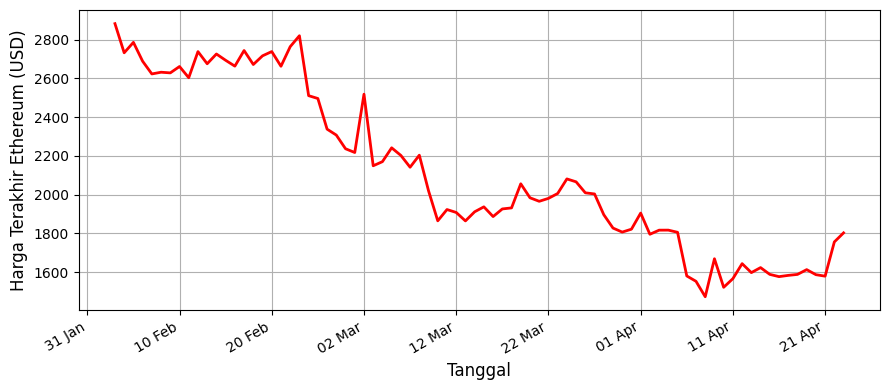

In [ ]:
data['Terakhir'] = data['Terakhir']
data['Terakhir'] = data['Terakhir']
data['Terakhir'] = pd.to_numeric(data['Terakhir'])
data['Tanggal'] = pd.to_datetime(data['Tanggal'])
data = data.sort_values('Tanggal')

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(data['Tanggal'], data['Terakhir'], linewidth=2, color="red")

ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.set_xlabel("Tanggal", fontsize=12)
ax.set_ylabel("Harga Terakhir Ethereum (USD)", fontsize=12)
ax.grid(True)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

## Statistik Deskriptif

In [ ]:
if data is not None:
  print(data.describe())
  print("\n")
  print(data.info())
else:
  print("DataFrame 'data' is empty. Please check the file path and loading process.")

                   Tanggal     Terakhir
count                   80    80.000000
mean   2025-03-14 12:00:00  2116.311250
min    2025-02-03 00:00:00  1473.390000
25%    2025-02-22 18:00:00  1806.660000
50%    2025-03-14 12:00:00  2004.780000
75%    2025-04-03 06:00:00  2607.987500
max    2025-04-23 00:00:00  2882.030000
std                    NaN   421.920683


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tanggal   80 non-null     datetime64[ns]
 1   Terakhir  80 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB
None


## Split Data

In [ ]:
data_awal = data.iloc[:60]
data_akhir = data.iloc[-20:]

## Matriks Hankel dan Transpose Matriks Hankel

In [ ]:
def hankel_matrix(data, rows, cols):
  return np.array([[data[i + j] for j in range(cols)] for i in range(rows)])

rows = 30
cols = 31

data_array = data['Terakhir'].values
hankel_mat = hankel_matrix(data_array, rows, cols)
hankel_df = pd.DataFrame(hankel_mat)

transposed_hankel_mat = hankel_mat.transpose()
transposed_hankel_df = pd.DataFrame(transposed_hankel_mat)

excel_file = 'Hankel.xlsx'
with pd.ExcelWriter(excel_file) as writer:
    hankel_df.to_excel(writer, sheet_name='HankelMatrix', index=False)
    transposed_hankel_df.to_excel(writer, sheet_name='TransposeHankelMatrix', index=False)

files.download(excel_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Matriks S

In [ ]:
s_matrix = np.dot(hankel_mat, transposed_hankel_mat)
s_df = pd.DataFrame(s_matrix)

excel_file_multiplied = 'Matriks S.xlsx'
with pd.ExcelWriter(excel_file_multiplied) as writer:
    s_df.to_excel(writer, sheet_name='S Matrix', index=False)

files.download(excel_file_multiplied)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Nilai Eigen dan Nilai Singular

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(s_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
singularvalues = np.sqrt(np.abs(sorted_eigenvalues))
singularvalues_df = pd.DataFrame({'Singularvalues': singularvalues})
eigenvalue_df = pd.DataFrame({'Eigenvalues': sorted_eigenvalues})

excel_file_eigen = 'Eigenvalues_Singularvalues.xlsx'
with pd.ExcelWriter(excel_file_eigen) as writer:
    eigenvalue_df.to_excel(writer, sheet_name='Eigenvalues', index=False)
    singularvalues_df.to_excel(writer, sheet_name='Singularvalues', index=False)

files.download(excel_file_eigen)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Matriks U (Matriks Vektor Eigen)

In [ ]:
sorted_eigenvectors = eigenvectors[:, sorted_indices]
excluded_indices = [2, 3, 5, 7, 10, 13, 14, 16, 19, 22, 23, 25, 26, 28]

excel_file_eigenvectors = 'Eigenvectors.xlsx'
with pd.ExcelWriter(excel_file_eigenvectors) as writer:
    all_vectors = []
    for i in range(len(sorted_eigenvalues)):
        eigenvector = sorted_eigenvectors[:, i]
        if i not in excluded_indices:
            eigenvector = -1 * eigenvector
        all_vectors.append(eigenvector)
        eigenvector_df = pd.DataFrame(eigenvector, columns=[f'Eigen Vektor {i+1}'])
        sheet_name = f'Eigenvector {i+1}'
        eigenvector_df.to_excel(writer, sheet_name=sheet_name, index=False)

    all_vectors_matrix = np.column_stack(all_vectors)
    all_vectors_df = pd.DataFrame(all_vectors_matrix, columns=[f'{i}' for i in range(len(sorted_eigenvalues))])
    all_vectors_df.to_excel(writer, sheet_name='All Eigenvectors', index=False)

files.download(excel_file_eigenvectors)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Matriks V (Principal Component) dan Transpose Matriks V

In [ ]:
principalcomponents = []

for i in range(len(singularvalues)):
    principalcomponent = np.dot(transposed_hankel_mat, all_vectors_matrix[:, i]) / singularvalues[i]
    principalcomponents.append(principalcomponent)
principalcomponents_matrix = np.column_stack(principalcomponents)

excel_file_results = 'Matriks Principal Components.xlsx'
with pd.ExcelWriter(excel_file_results) as writer:
    gabungan_df = pd.DataFrame(principalcomponents_matrix, columns=[f'{i}' for i in range(len(singularvalues))])
    gabungan_df.to_excel(writer, sheet_name='Principal Componenents', index=False)

    transpose_df = pd.DataFrame(principalcomponents_matrix.T, columns=[f'v_{i+1}' for i in range(principalcomponents_matrix.shape[0])])
    transpose_df.to_excel(writer, sheet_name='Transpose PC', index=False)

    for row_index, row in enumerate(principalcomponents_matrix):
        row_df = pd.DataFrame([row], columns=[f'{i}' for i in range(len(singularvalues))])
        sheet_name = f'v_{row_index + 1}'
        row_df.to_excel(writer, sheet_name=sheet_name, index=False)

files.download(excel_file_results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Matriks X*

In [ ]:
L = 30
K = 31
N = L + K - 1

Xi_list = []
for i in range(len(singularvalues)):
    ui = all_vectors_matrix[:, i].reshape(-1, 1)
    vi = principalcomponents_matrix.T[i, :].reshape(1, -1)
    Xi = singularvalues[i] * np.dot(ui, vi)
    Xi_list.append(Xi)

X_reconstructed = np.sum(Xi_list, axis=0)

excel_file_results = 'Matriks_X_Star.xlsx'
with pd.ExcelWriter(excel_file_results, engine='openpyxl') as writer:
    for i, Xi in enumerate(Xi_list):
        df = pd.DataFrame(Xi, columns=range(K))
        df.to_excel(writer, sheet_name=f'X_{i+1}', index=False, header=True)

    df_reconstructed = pd.DataFrame(X_reconstructed, columns=range(K))
    df_reconstructed.to_excel(writer, sheet_name="X_reconstructed", index=False, header=True)

files.download(excel_file_results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Plot Nilai Singular

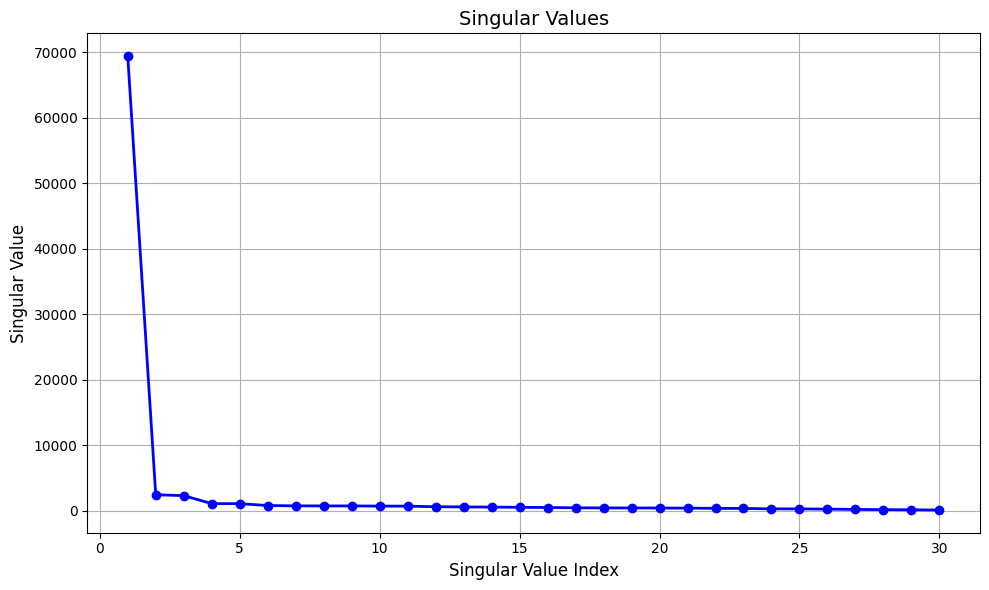

In [ ]:
x_index = np.arange(1, len(singularvalues) + 1)

plt.figure(figsize=(10, 6))
plt.plot(x_index, singularvalues, 'bo-', linewidth=2, markersize=6)
plt.title('Singular Values', fontsize=14)
plt.xlabel('Singular Value Index', fontsize=12)
plt.ylabel('Singular Value', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## Plot X*

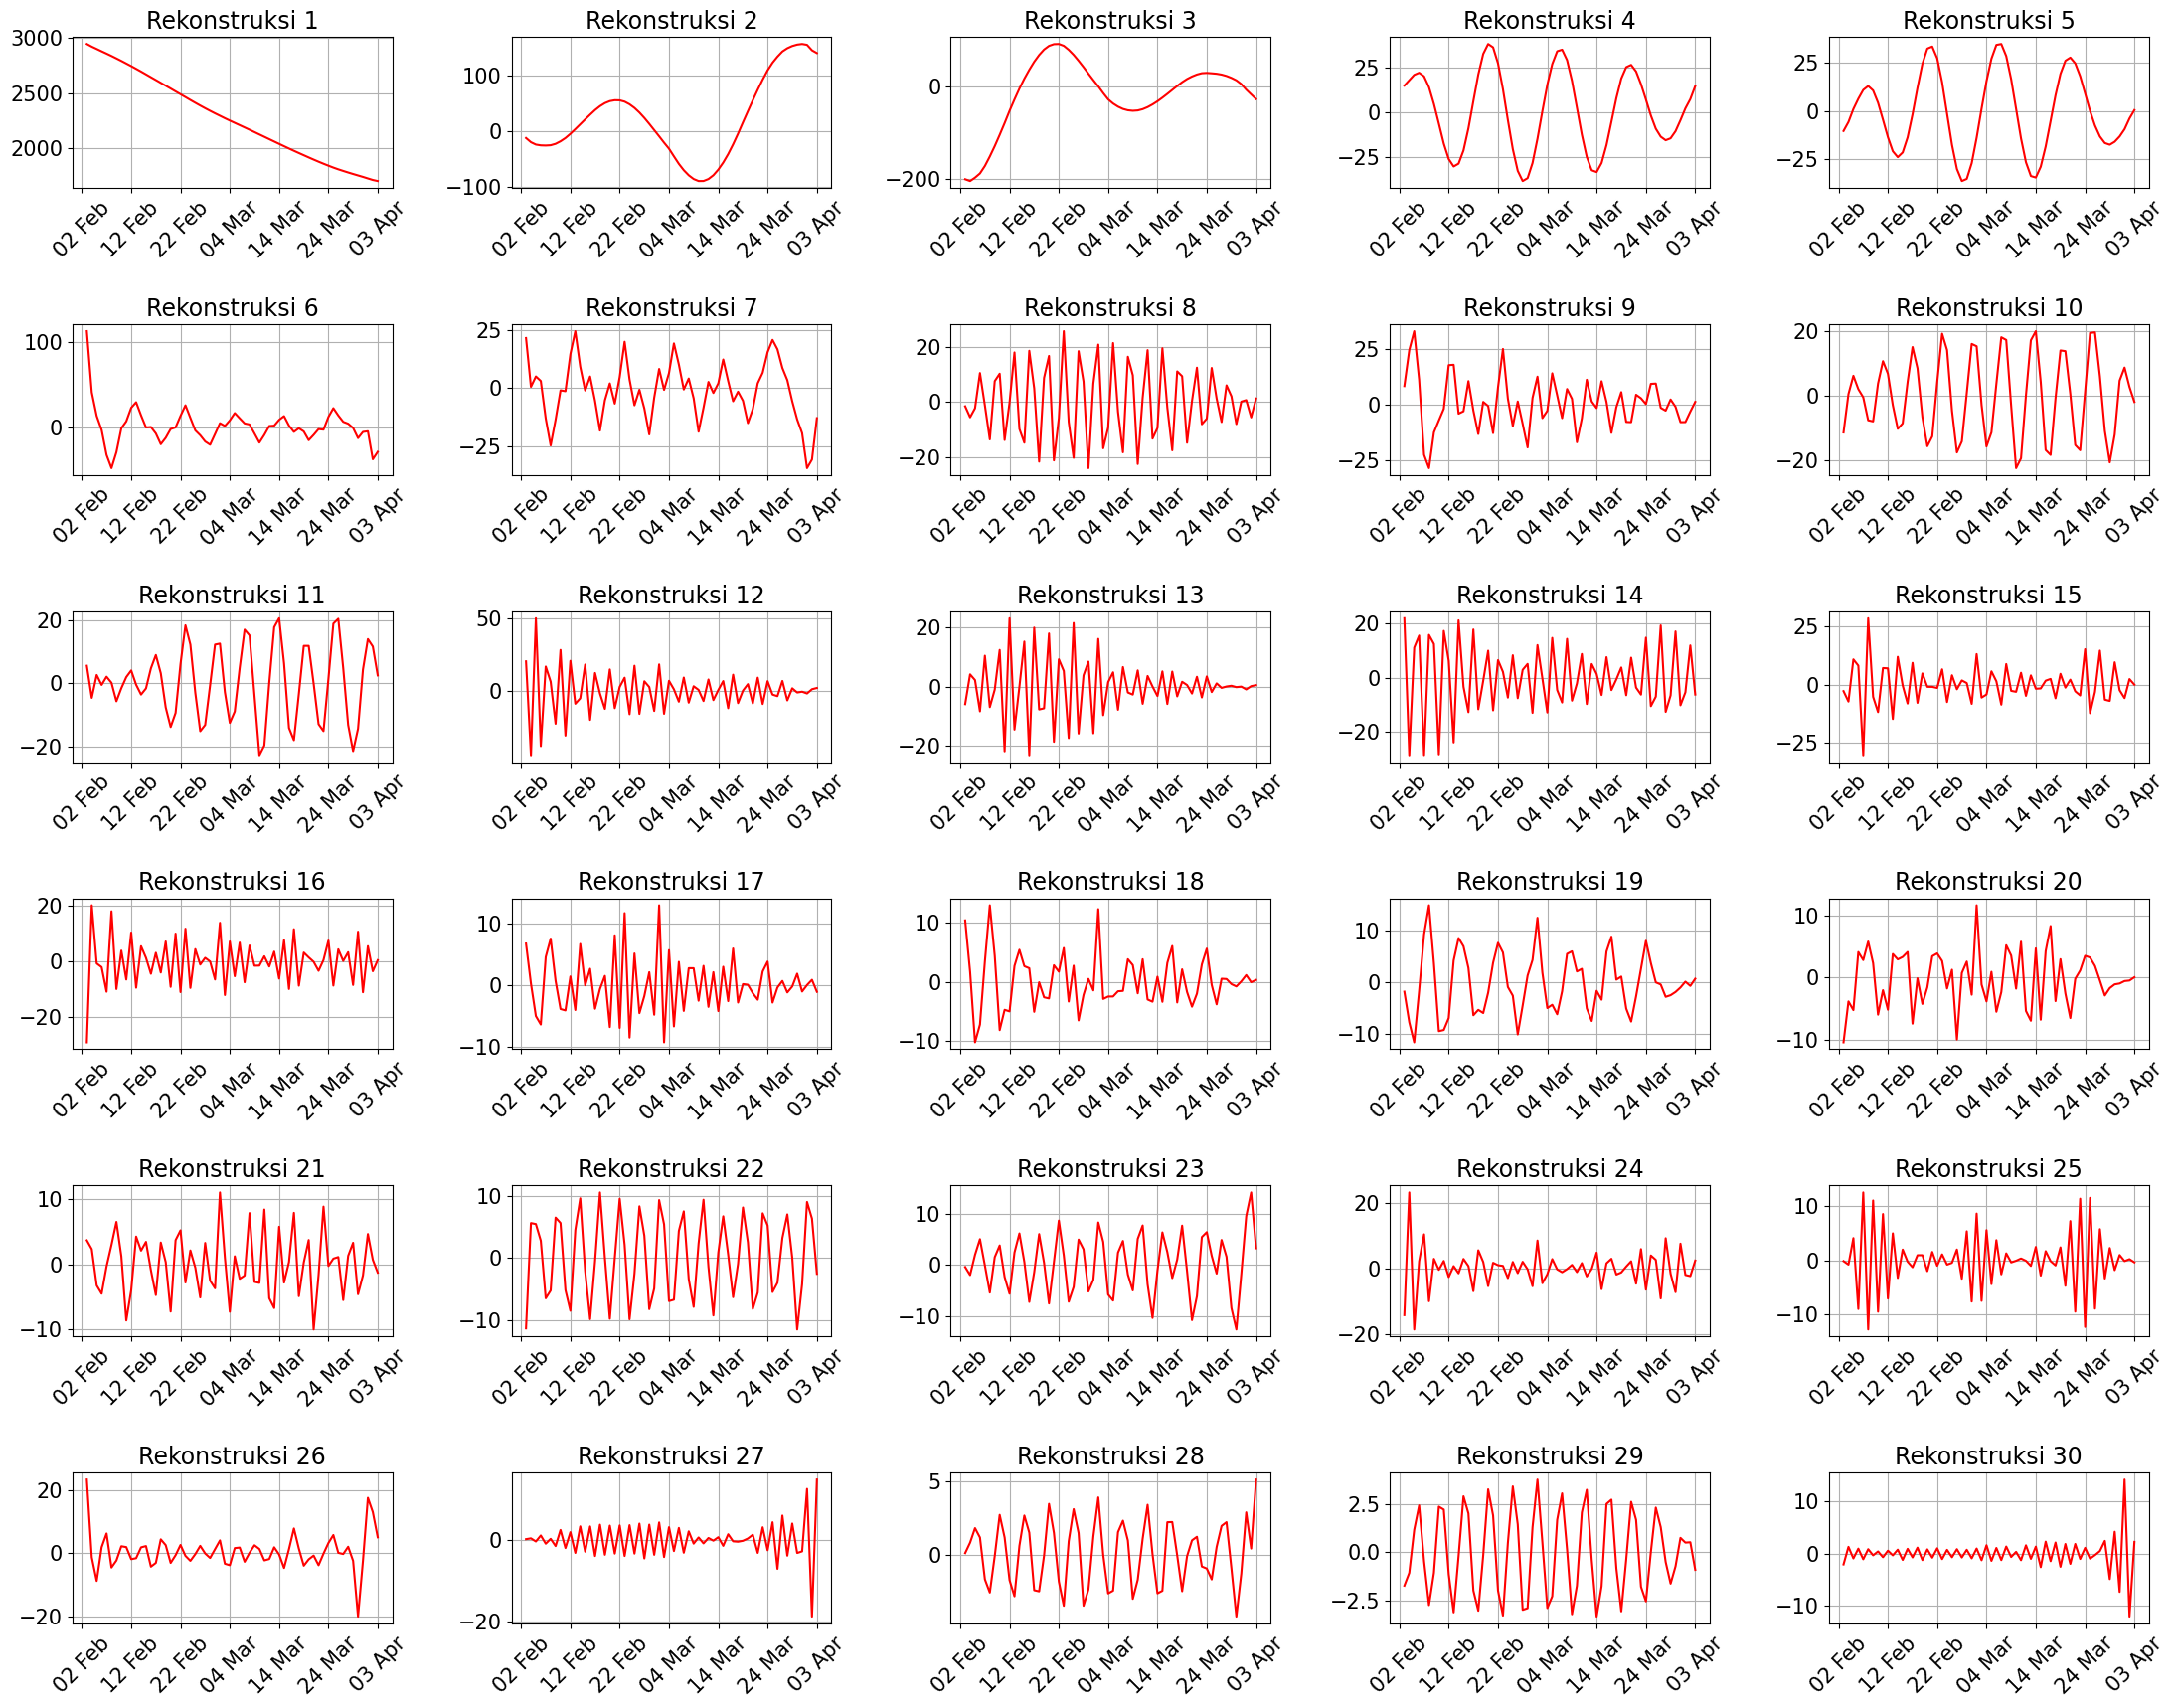

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def diagonal_averaging(X):
    L, K = X.shape
    N = L + K - 1
    result = np.zeros(N)
    count = np.zeros(N)
    for i in range(L):
        for j in range(K):
            result[i + j] += X[i, j]
            count[i + j] += 1
    return result / count

reconstructed_series_list = []
for Xi in Xi_list:
    series = diagonal_averaging(Xi)
    reconstructed_series_list.append(series)

excel_file_name = "Rekonstruksi.xlsx"
with pd.ExcelWriter(excel_file_name, engine='openpyxl') as writer:
    for i, series in enumerate(reconstructed_series_list):
        df_r = pd.DataFrame(series, columns=[f'R{i+1}'])
        df_r.to_excel(writer, sheet_name=f'R{i+1}', index=False)

n = len(reconstructed_series_list[0])
tanggal = pd.date_range(start='2025-02-03', periods=n, freq='D')

fig, axs = plt.subplots(6, 5, figsize=(22, 18))

for i in range(min(30, len(reconstructed_series_list))):
    row, col = divmod(i, 5)
    ax = axs[row, col]
    ax.plot(tanggal, reconstructed_series_list[i], color="red")
    ax.set_title(f'Rekonstruksi {i+1}', fontsize=17)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
    ax.tick_params(axis='x', rotation=45, labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.grid(True)

for j in range(len(reconstructed_series_list), 30):
    row, col = divmod(j, 5)
    axs[row, col].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=2.5, w_pad=2.5)
plt.show()

files.download(excel_file_name)

## Plot W-Correlation

<ipython-input-18-1ac226564a2d>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greys')


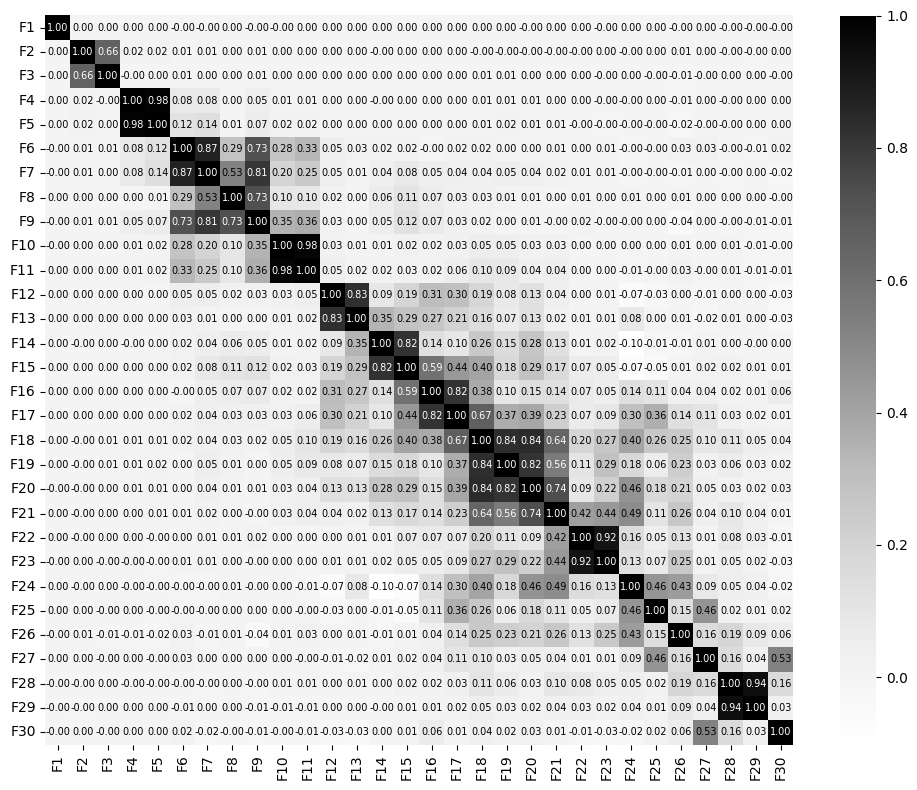

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def w_correlation(Xi_list):
    n = len(Xi_list)
    N = diagonal_averaging(Xi_list[0]).size
    L_star = Xi_list[0].shape[0]
    K_star = Xi_list[0].shape[1]

    w = np.zeros(N)
    for i in range(N):
        if i + 1 < L_star:
            w[i] = i + 1
        elif i + 1 <= K_star:
            w[i] = L_star
        else:
            w[i] = N - i

    df_w = pd.DataFrame({'Index': np.arange(1, N+1), 'Bobot_w': w})
    df_w.to_excel("Bobot_W.xlsx", index=False)
    S_list = [diagonal_averaging(Xi) for Xi in Xi_list]

    corr_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            numerator = np.sum(w * S_list[i] * S_list[j])
            norm_i = np.sqrt(np.sum(w * S_list[i] ** 2))
            norm_j = np.sqrt(np.sum(w * S_list[j] ** 2))
            corr_matrix[i, j] = numerator / (norm_i * norm_j) if norm_i * norm_j != 0 else 0
    return corr_matrix

w_corr = w_correlation(Xi_list)

plt.figure(figsize=(10, 8))
cmap = cm.get_cmap('Greys')
norm = colors.Normalize(vmin=np.min(w_corr), vmax=np.max(w_corr))

ax = sns.heatmap(w_corr, cmap='Greys', annot=True, fmt=".2f",
                 xticklabels=[f'F{i+1}' for i in range(len(Xi_list))],
                 yticklabels=[f'F{i+1}' for i in range(len(Xi_list))],
                 annot_kws={"size": 7})

for text in ax.texts:
    value = float(text.get_text())
    rgba = cmap(norm(value))
    r, g, b = rgba[:3]
    brightness = 0.299 * r + 0.587 * g + 0.114 * b
    text.set_color('white' if brightness < 0.5 else 'black')

plt.tight_layout()
plt.show()

files.download("Bobot_W.xlsx")

## XI2*

In [ ]:
X2_star = Xi_list[1]
X3_star = Xi_list[2]

if X2_star.shape == X3_star.shape:
    X23_sum = X2_star + X3_star

    df_X23 = pd.DataFrame(X23_sum)
    df_X23.to_excel("XI2*.xlsx", index=False, header=False)
    print("Hasil XI2* telah disimpan dalam 'XI2*.xlsx'.")
else:
    print("Ukuran X2* dan X3* tidak sama, tidak bisa dijumlahkan.")

files.download("XI2*.xlsx")

Hasil XI2* telah disimpan dalam 'XI2*.xlsx'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## XI3*

In [ ]:
X4_star = Xi_list[3]
X5_star = Xi_list[4]

if X4_star.shape == X5_star.shape:
    X45_sum = X4_star + X5_star

    df_X45 = pd.DataFrame(X45_sum)
    df_X45.to_excel("XI3*.xlsx", index=False, header=False)
    print("Hasil XI3* telah disimpan dalam 'XI3*.xlsx'.")
else:
    print("Ukuran X4* dan X5* tidak sama, tidak bisa dijumlahkan.")

files.download("XI3*.xlsx")

Hasil XI3* telah disimpan dalam 'XI3*.xlsx'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Deret Rekonstruksi Trend, Seasonal 1, dan Seasonal 2

In [ ]:
def diagonal_averaging(X):
    L, K = X.shape
    N = L + K - 1
    result = np.zeros(N)
    count = np.zeros(N)
    for i in range(L):
        for j in range(K):
            result[i + j] += X[i, j]
            count[i + j] += 1
    return result / count

X1_star = Xi_list[0]
X2_star = Xi_list[1]
X3_star = Xi_list[2]
X4_star = Xi_list[3]
X5_star = Xi_list[4]

series_X1 = diagonal_averaging(X1_star)
series_X23 = diagonal_averaging(X23_sum)
series_X45 = diagonal_averaging(X45_sum)

df_r_1d = pd.DataFrame({
    "Trend": series_X1,
    "Seasonal 1": series_X23,
    "Seasonal 2": series_X45
})

file_name = "Trend dan Seasonal.xlsx"
df_r_1d.to_excel(file_name, index=False)
print(f"Rekonstruksi 1D berhasil disimpan dalam file '{file_name}'.")

files.download(file_name)

Rekonstruksi 1D berhasil disimpan dalam file 'Trend dan Seasonal.xlsx'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Plot Data Rekonstruksi Trend, Seasonal 1, dan Seasonal 2

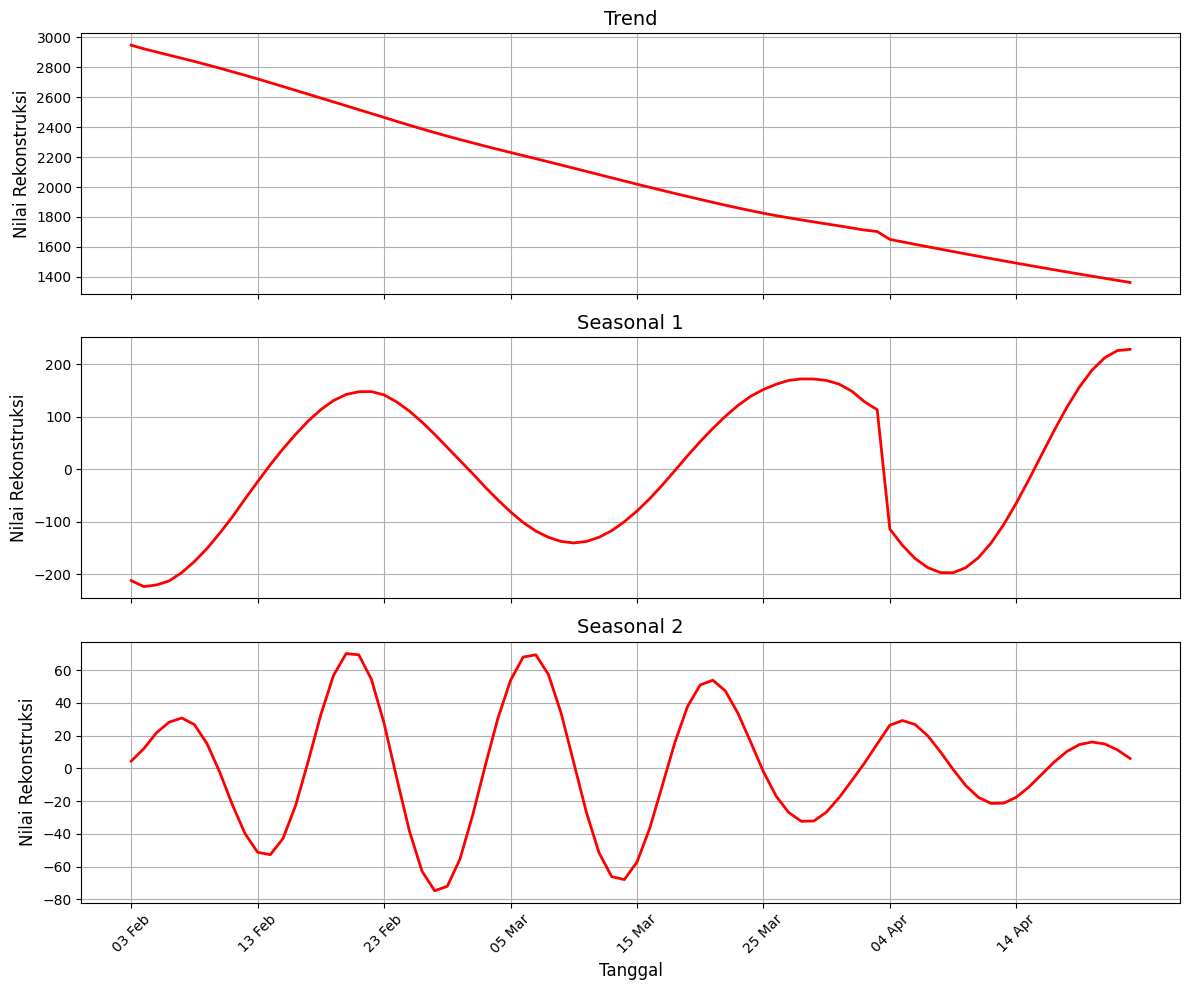

In [ ]:
n = len(series_X1)
tanggal = pd.date_range(start='2025-02-03', periods=n, freq='D')

fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

axs[0].plot(tanggal, series_X1, color='red', linewidth=2)
axs[0].set_title('Trend', fontsize=14)
axs[0].set_ylabel('Nilai Rekonstruksi', fontsize=12)
axs[0].grid(True)

axs[1].plot(tanggal, series_X23, color='red', linewidth=2)
axs[1].set_title('Seasonal 1', fontsize=14)
axs[1].set_ylabel('Nilai Rekonstruksi', fontsize=12)
axs[1].grid(True)

axs[2].plot(tanggal, series_X45, color='red', linewidth=2)
axs[2].set_title('Seasonal 2', fontsize=14)
axs[2].set_xlabel('Tanggal', fontsize=12)
axs[2].set_ylabel('Nilai Rekonstruksi', fontsize=12)
axs[2].grid(True)

axs[2].set_xticks(tanggal[::10])
axs[2].set_xticklabels(tanggal[::10].strftime('%d %b'), rotation=45)

plt.tight_layout()
plt.show()

## Koefisien LRF Trend

In [ ]:
col_1 = all_vectors_matrix[:, 0]

pi = col_1[-1]

r_values_trend = np.zeros(len(all_vectors_matrix) - 1)

for r in range(len(all_vectors_matrix) - 1):
    val_col_1_r = col_1[r]
    numerator = (pi * val_col_1_r)
    denominator = 1 - (pi**2)
    r_values_trend[r] = numerator / denominator

df_rt = pd.DataFrame({
    'r': range(1, len(r_values_trend) + 1),
    'Koefisien LRF': r_values_trend
})

file_name = "Koefisien LRF Trend.xlsx"
df_rt.to_excel(file_name, index=False)
print(f"Koefisien LRF Trend berhasil disimpan dalam file '{file_name}'.")

files.download(file_name)

Koefisien LRF Trend berhasil disimpan dalam file 'Koefisien LRF Trend.xlsx'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Koefisien LRF Seasonal 1

In [ ]:
col_2 = all_vectors_matrix[:, 1]
col_3 = all_vectors_matrix[:, 2]

pi1 = col_2[-1]
pi2 = col_3[-1]

r_values_seasonal_1 = np.zeros(len(all_vectors_matrix) - 1)

for r in range(len(all_vectors_matrix) - 1):
    val_col_2_r = col_2[r]
    val_col_3_r = col_3[r]
    numerator = (pi1 * val_col_2_r) + (pi2 * val_col_3_r)
    denominator = 1 - (pi1**2 + pi2**2)
    r_values_seasonal_1[r] = numerator / denominator

df_rs1 = pd.DataFrame({
    'r': range(1, len(r_values_seasonal_1) + 1),
    'Koefisien LRF': r_values_seasonal_1
})

file_name = "Koefisien LRF Seasonal 1.xlsx"
df_rs1.to_excel(file_name, index=False)
print(f"Koefisien LRF Seasonal 1 berhasil disimpan dalam file '{file_name}'.")

files.download(file_name)

Koefisien LRF Seasonal 1 berhasil disimpan dalam file 'Koefisien LRF Seasonal 1.xlsx'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Koefisien LRF Seasonal 2

In [ ]:
col_4 = all_vectors_matrix[:, 3]
col_5 = all_vectors_matrix[:, 4]

pi3 = col_4[-1]
pi4 = col_5[-1]

r_values_seasonal_2 = np.zeros(len(all_vectors_matrix) - 1)

for r in range(len(all_vectors_matrix) - 1):
    val_col_4_r = col_4[r]
    val_col_5_r = col_5[r]
    numerator = (pi3 * val_col_4_r) + (pi4 * val_col_5_r)
    denominator = 1 - (pi3**2 + pi4**2)
    r_values_seasonal_2[r] = numerator / denominator

df_rs2 = pd.DataFrame({
    'r': range(1, len(r_values_seasonal_2) + 1),
    'Koefisien LRF': r_values_seasonal_2
})

file_name = "Koefisien LRF Seasonal 2.xlsx"
df_rs2.to_excel(file_name, index=False)
print(f"Koefisien LRF Seasonal 2 berhasil disimpan dalam file '{file_name}'.")

files.download(file_name)

Koefisien LRF Seasonal 2 berhasil disimpan dalam file 'Koefisien LRF Seasonal 2.xlsx'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Peramalan Trend Out Sample

In [ ]:
r = r_values_trend

for i in range(60, 80):
    g_i = 0
    for j in range(29):
        g_i += r[j] * series_X1[i - j - 1]
    series_X1 = np.append(series_X1, g_i)

g_trend_df = pd.DataFrame(series_X1[60:], columns=['ghat'], index=[f'{i+1}' for i in range(60, 80)])

file_name = 'ghat Trend.xlsx'
g_trend_df.to_excel(file_name)

print(f"Nilai ghat 61 hingga ghat 80 trend telah disimpan dalam file Excel: {file_name}")
files.download(file_name)

Nilai ghat 61 hingga ghat 80 trend telah disimpan dalam file Excel: ghat Trend.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Peramalan Seasonal 1 Out Sample

In [ ]:
r = r_values_seasonal_1

for i in range(60, 80):
    g_i = 0
    for j in range(29):
        g_i += r[j] * series_X23[i - j - 1]
    series_X23 = np.append(series_X23, g_i)

g_seasonal_1_df = pd.DataFrame(series_X23[60:], columns=['ghat'], index=[f'{i+1}' for i in range(60, 80)])

file_name = 'ghat Seasonal 1.xlsx'
g_seasonal_1_df.to_excel(file_name)

print(f"Nilai ghat 61 hingga ghat 80 seasonal 1 telah disimpan dalam file Excel: {file_name}")
files.download(file_name)

Nilai ghat 61 hingga ghat 80 seasonal 1 telah disimpan dalam file Excel: ghat Seasonal 1.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Peramalan Seasonal 2 Out Sample

In [ ]:
r = r_values_seasonal_2

for i in range(60, 80):
    g_i = 0
    for j in range(29):
        g_i += r[j] * series_X45[i - j - 1]
    series_X45 = np.append(series_X45, g_i)

g_seasonal_2_df = pd.DataFrame(series_X45[60:], columns=['ghat'], index=[f'{i+1}' for i in range(60, 80)])

file_name = 'ghat Seasonal 2.xlsx'
g_seasonal_2_df.to_excel(file_name)

print(f"Nilai ghat 61 hingga ghat 80 seasonal 2 telah disimpan dalam file Excel: {file_name}")
files.download(file_name)

Nilai ghat 61 hingga ghat 80 seasonal 2 telah disimpan dalam file Excel: ghat Seasonal 2.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Peramalan Out Sample

In [ ]:
peramalan_os = np.array(g_trend_df['ghat'] + g_seasonal_1_df['ghat'] + g_seasonal_2_df['ghat'])
peramalan_os_df = pd.DataFrame(peramalan_os, columns=['Peramalan'])

file_name = 'Peramalan Out Sample.xlsx'
peramalan_os_df.to_excel(file_name, index=False)

print(f"Hasil peramalan out sample telah disimpan dalam file Excel: {file_name}")
files.download(file_name)

Hasil peramalan out sample telah disimpan dalam file Excel: Peramalan Out Sample.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inisiasi Peramalan 20 Periode Mendatang

In [ ]:
trend_1_80_df = pd.concat([df_r_1d['Trend'], g_trend_df['ghat']])

seasonal1_1_80_df = pd.concat([df_r_1d['Seasonal 1'], g_seasonal_1_df['ghat']])

seasonal2_1_80_df = pd.concat([df_r_1d['Seasonal 2'], g_seasonal_2_df['ghat']])

peramalan_1_80 = trend_1_80_df.values + seasonal1_1_80_df.values + seasonal2_1_80_df.values

trend_1_80 = trend_1_80_df.to_numpy()

seasonal1_1_80 = seasonal1_1_80_df.to_numpy()

seasonal2_1_80 = seasonal2_1_80_df.to_numpy()

## Peramalan Trend 20 Untuk Periode Mendatang

In [ ]:
r = r_values_trend

for i in range(80, 100):
    g_i = 0
    for j in range(29):
        g_i += r[j] * trend_1_80[i - j - 1]
    trend_1_80 = np.append(trend_1_80, g_i)

peramalan_trend_df = pd.DataFrame(trend_1_80[80:], columns=['ghat'], index=[f'{i+1}' for i in range(80, 100)])

file_name = '20 Peramalan Trend.xlsx'
peramalan_trend_df.to_excel(file_name)

print(f"Nilai 20 peralaman trend telah disimpan dalam file Excel: {file_name}")
files.download(file_name)

Nilai 20 peralaman trend telah disimpan dalam file Excel: 20 Peramalan Trend.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Peramalan Seasonal 1 Untuk 20 Periode Mendatang

In [ ]:
r = r_values_seasonal_1

for i in range(80, 100):
    g_i = 0
    for j in range(29):
        g_i += r[j] * seasonal1_1_80[i - j - 1]
    seasonal1_1_80 = np.append(seasonal1_1_80, g_i)

peramalan_seasonal_1_df = pd.DataFrame(seasonal1_1_80[80:], columns=['ghat'], index=[f'{i+1}' for i in range(80, 100)])

file_name = '20 Peramalan Seasonal 1.xlsx'
peramalan_seasonal_1_df.to_excel(file_name)

print(f"Nilai 20 peralaman seasonal 1 telah disimpan dalam file Excel: {file_name}")
files.download(file_name)

Nilai 20 peralaman seasonal 1 telah disimpan dalam file Excel: 20 Peramalan Seasonal 1.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Peramalan Seasonal 2 Untuk 20 Periode Mendatang

In [ ]:
r = r_values_seasonal_2

for i in range(80, 100):
    g_i = 0
    for j in range(29):
        g_i += r[j] * seasonal2_1_80[i - j - 1]
    seasonal2_1_80 = np.append(seasonal2_1_80, g_i)

peramalan_seasonal_2_df = pd.DataFrame(seasonal2_1_80[80:], columns=['ghat'], index=[f'{i+1}' for i in range(80, 100)])

file_name = '20 Peramalan Seasonal 2.xlsx'
peramalan_seasonal_2_df.to_excel(file_name)

print(f"Nilai 20 peralaman seasonal 2 telah disimpan dalam file Excel: {file_name}")
files.download(file_name)

Nilai 20 peralaman seasonal 2 telah disimpan dalam file Excel: 20 Peramalan Seasonal 2.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Peramalan 20 Untuk Periode Mendatang

In [ ]:
peramalan_20 = np.array(peramalan_trend_df['ghat'] + peramalan_seasonal_1_df['ghat'] + peramalan_seasonal_2_df['ghat'])
peramalan_20_df = pd.DataFrame(peramalan_20, columns=['Peramalan'])

file_name = 'Peramalan 20 Periode Selanjutnya.xlsx'
peramalan_20_df.to_excel(file_name, index=False)

print(f"Hasil peramalan 20 periode selanjutnya telah disimpan dalam file Excel: {file_name}")
files.download(file_name)

Hasil peramalan 20 periode selanjutnya telah disimpan dalam file Excel: Peramalan 20 Periode Selanjutnya.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Plot Aktual, Peramalan, dan Peramalan Untuk 20 Periode Mendatang

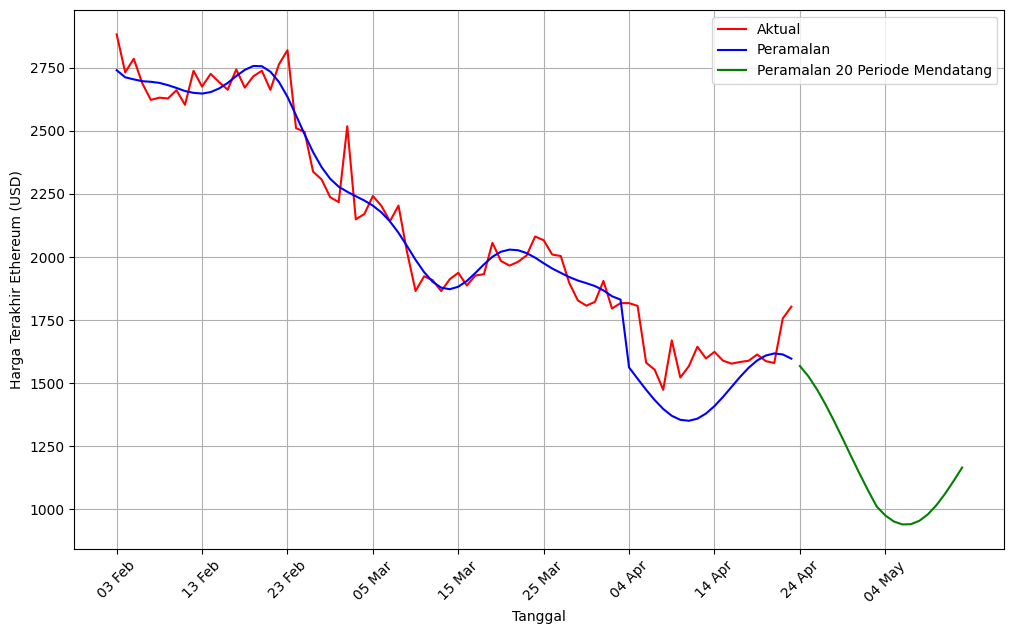

In [ ]:
tanggal = pd.date_range(start='2025-02-03', periods=100, freq='D')

plt.figure(figsize=(12, 7))
plt.plot(tanggal[:80], data['Terakhir'], color='red', label='Aktual')
plt.plot(tanggal[:80], peramalan_1_80, color='blue', label='Peramalan')
plt.plot(tanggal[80:], peramalan_20, color='green', label='Peramalan 20 Periode Mendatang')
plt.xticks(ticks=tanggal[::10], labels=tanggal[::10].strftime('%d %b'), rotation=45)
plt.xlabel('Tanggal')
plt.ylabel('Harga Terakhir Ethereum (USD)')
plt.legend()
plt.grid(True)

plt.show()